 <font size=6> **实验4 逻辑回归**</font>

- 1、理解逻辑回归进行分类的基本思想；
- 2、掌握使用Sklearn库中的LogisticRegression进行二分类、多分类的基本方法；
- 3、理解对图像、文本数据进行预处理、显示的流程和要点，并能使用LogisticRegression()进行分类；
- 4、理解分类模型评价指标。

**(实验报告提交题)**参考理论课4_3.ipynb，请按照下列要求，加载iris数据集，调用sklearn库LogisticRegression实现分类
- (1)导入sklearn.datasets中iris数据集，查看数据、标签、feature_names属性、target_names属性据；
- (2)数据特征选择第3、4列、标签选择其中的任意两类(如1、2)构建数据进行二分类(测试数据比例为0.2)，查看系数、截矩、分类概率；并利用metrics得到训练数据、测试数据预测结果的准确率、混淆矩阵和分类报告，并绘制散点图、决策边界和ROC_AUC图；
- (3)对所有数据进行多分类(测试数据比例为0.2)，查看系数、截矩、分类概率；并利用metrics得到训练数据、测试数据预测结果的准确率、混淆矩阵和分类报告。

# 导入库

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt


# 数据集

**(1)导入sklearn.datasets中iris数据集，查看数据、标签、feature_names属性、target_names属性**

## 加载数据

In [ ]:
iris = load_iris()

## 数据探查

<1> 查看数据

In [ ]:
print("特征前5行：\n", iris.data[:5])

特征前5行：
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


<2> 查看标签

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<3> 查看feature_names属性

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<4> 查看target_names属性

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 建模 - 二分类

**(2)数据特征选择第3、4列、标签选择其中的任意两类(如1、2)构建数据进行二分类(测试数据比例为0.2)，查看系数、截矩、分类概率；并利用metrics得到训练数据、测试数据预测结果的准确率、混淆矩阵和分类报告，并绘制散点图、决策边界和ROC_AUC图**

## 数据集处理

<1> 特征选择3，4列, 同时标签选择1、2

In [ ]:
X = iris.data[:, [2,3]][iris.target!=0]
y = iris.target[iris.target > 0]

<2> 构造训练集和测试集（0.2）

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 模型训练和评估

<1> 创建逻辑回归模型并训练

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.95

<2> 查看系数、截矩、分类概率

In [ ]:
print('模型的系数：', lr.coef_)
print('模型的截距：', lr.intercept_)
print('模型的分类概率：\n', lr.predict_proba(X_test))

模型的系数： [[2.68579814 2.14497988]]
模型的截距： [-16.70530321]
模型的分类概率：
 [[0.44775709 0.55224291]
 [0.10009854 0.89990146]
 [0.02827211 0.97172789]
 [0.94536907 0.05463093]
 [0.93317261 0.06682739]
 [0.95983004 0.04016996]
 [0.5811321  0.4188679 ]
 [0.02289832 0.97710168]
 [0.99429125 0.00570875]
 [0.74631986 0.25368014]
 [0.80246013 0.19753987]
 [0.98432351 0.01567649]
 [0.42163346 0.57836654]
 [0.39550377 0.60449623]
 [0.02979641 0.97020359]
 [0.75642195 0.24357805]
 [0.48812932 0.51187068]
 [0.42163346 0.57836654]
 [0.97848238 0.02151762]
 [0.99027103 0.00972897]]


<3> 利用metrics得到训练数据、测试数据预测结果的准确率、混淆矩阵和分类报告

In [ ]:
print("训练数据的准确率：",accuracy_score(y_train, lr.predict(X_train)))
print("测试数据的准确率：",accuracy_score(y_test, lr.predict(X_test)))
print("")
print("训练数据的混淆矩阵：\n",confusion_matrix(y_train, lr.predict(X_train)))
print("测试数据的混淆矩阵：\n",confusion_matrix(y_test, lr.predict(X_test)))
print("")
print("训练数据的分类报告：\n",classification_report(y_train, lr.predict(X_train)))
print("测试数据的分类报告：\n",classification_report(y_test, lr.predict(X_test)))

训练数据的准确率： 0.95
测试数据的准确率： 0.95

训练数据的混淆矩阵：
 [[36  2]
 [ 2 40]]
测试数据的混淆矩阵：
 [[11  1]
 [ 0  8]]

训练数据的分类报告：
               precision    recall  f1-score   support

           1       0.95      0.95      0.95        38
           2       0.95      0.95      0.95        42

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

测试数据的分类报告：
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



## 模型可视化

<1> 散点图和决策边界

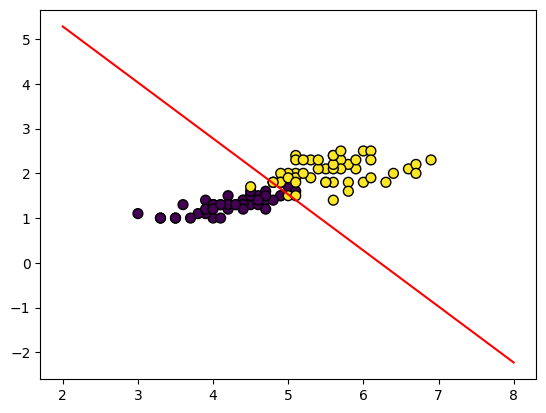

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y, s = 50, edgecolors = 'k')
#plt.scatter(X_train[:,0], X_train[:,1], c = y_train, s = 50, edgecolors = 'k')
#plt.scatter(X_test[:,0], X_test[:,1], c = y_test, s = 50, edgecolors = 'k')

#定义lr决策边界函数
w0 = lr.intercept_[0]
w1 = lr.coef_[0][0]
w2 = lr.coef_[0][1]

def f(x):
    return (-w0-w1*x)/w2

#画决策边界图
x = np.linspace(2, 8, 200)
plt.plot(x, f(x), c='r')
plt.show()

<2> ROC_AUC图

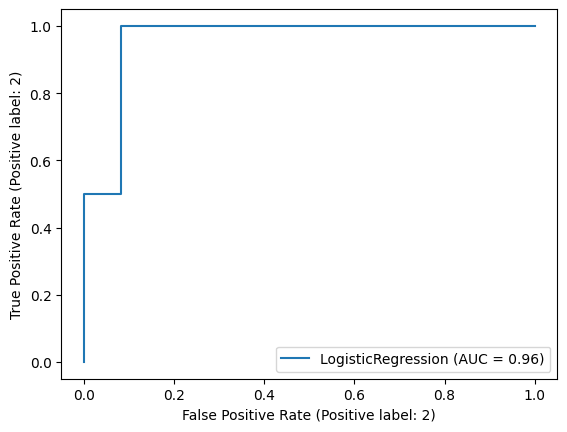

In [ ]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

# 建模 - 多分类

**(3)对所有数据进行多分类(测试数据比例为0.2)，查看系数、截矩、分类概率；并利用metrics得到训练数据、测试数据预测结果的准确率、混淆矩阵和分类报告**

## 数据集划分

对所有数据，构造测试集和训练集（0.2）



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

## 模型训练和评估

`<1> 创建逻辑回归模型并训练

In [ ]:
lr_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_multi.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

<2> 查看系数、截矩、分类概率

In [ ]:
print('模型的系数：', lr_multi.coef_)
print("")
print('模型的截矩：', lr_multi.intercept_)
print("")
print('模型的分类概率：\n', lr_multi.predict_proba(X_test))


模型的系数： [[-0.39722222  0.96078798 -2.37395779 -1.00329173]
 [ 0.51294154 -0.25372598 -0.21560233 -0.76901609]
 [-0.11571932 -0.707062    2.58956012  1.77230782]]

模型的截矩： [  9.03250813   1.8426525  -10.87516064]

模型的分类概率：
 [[3.78540536e-03 8.27210040e-01 1.69004555e-01]
 [9.46727170e-01 5.32726301e-02 1.99986472e-07]
 [8.72385695e-09 1.55691544e-03 9.98443076e-01]
 [6.43448555e-03 7.92126722e-01 2.01438792e-01]
 [1.44095507e-03 7.74344685e-01 2.24214360e-01]
 [9.55768196e-01 4.42316271e-02 1.76849604e-07]
 [7.76122937e-02 9.08082088e-01 1.43056180e-02]
 [1.61401764e-04 1.55690377e-01 8.44148221e-01]
 [2.20736359e-03 7.62834324e-01 2.34958312e-01]
 [2.83154099e-02 9.45798684e-01 2.58859062e-02]
 [4.39679077e-04 2.43281228e-01 7.56279093e-01]
 [9.68307934e-01 3.16919881e-02 7.80649368e-08]
 [9.72933932e-01 2.70660346e-02 3.33361450e-08]
 [9.62096919e-01 3.79029701e-02 1.10921543e-07]
 [9.79272619e-01 2.07273164e-02 6.47441610e-08]
 [4.54276495e-03 7.12605191e-01 2.82852044e-01]
 [7.2263101

<3> 利用metrics得到训练数据、测试数据预测结果的准确率、混淆矩阵和分类报告

In [ ]:
print("训练数据的准确率：",accuracy_score(y_train, lr_multi.predict(X_train)))
print("测试数据的准确率：",accuracy_score(y_test, lr_multi.predict(X_test)))
print("")
print("训练数据的混淆矩阵：\n",confusion_matrix(y_train, lr_multi.predict(X_train)))
print("测试数据的混淆矩阵：\n",confusion_matrix(y_test, lr_multi.predict(X_test)))
print("")
print("训练数据的分类报告：\n",classification_report(y_train, lr_multi.predict(X_train)))
print("测试数据的分类报告：\n",classification_report(y_test, lr_multi.predict(X_test)))


训练数据的准确率： 0.975
测试数据的准确率： 1.0

训练数据的混淆矩阵：
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
测试数据的混淆矩阵：
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

训练数据的分类报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120

测试数据的分类报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

